<a href="https://colab.research.google.com/github/lucas96aquino/projeto-energiaeletrica/blob/main/ENERGIA_ELETRICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados do Índice ANEEL de Satisfação do Consumidor

O IASC busca avaliar o grau de satisfação do consumidor residencial com relação aos serviços prestados por distribuidoras de energia elétrica.

A análise abaixo busca analisar segundo os seguintes critérios:



*   Concessionárias do Nordeste;
*   Exclusivamente os dados de Qualidade, Satisfação e Fidelidade.





## Importando as libs e subindo o DataFrame

In [1]:
# Importar as libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving indice-aneel-satisfacao-consumidor.csv to indice-aneel-satisfacao-consumidor.csv


In [41]:
import matplotlib

In [2]:
df = pd.read_csv("indice-aneel-satisfacao-consumidor.csv", sep=';', encoding='latin1', error_bad_lines=False)

<ipython-input-2-e1414c3fb4ee>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("indice-aneel-satisfacao-consumidor.csv", sep=';', encoding='latin1', error_bad_lines=False)


## Manipulando o DataFrame e realizando as transformações:



*   Filtrando por Ano e Concessionária;
*   Lidando com dados nulos;
*   Verificando os tipos de dados;
*   Transformando objetos em números.






In [3]:
df

,DatGeracaoConjuntoDados,NumAno,DscClassificacao,DescricaoCategoria,SigAgente,NumCNPJ,NumOrdemIASC,MdaIndicadorQualidade,MdaIndicadorSatisfacao,MdaIndicadorFidelidade,...,QtdEscolaridadeV37,QtdEscolaridadeV38,QtdEscolaridadeV39,QtdRendaV41,QtdRendaV42,QtdRendaV43,QtdRendaV44,QtdRendaV45,QtdRendaV46,QtdRendaV47
0,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Mux Energia,97578090000134,1,"89,998518910000001","75,688265220000005","32,807498860000003",...,27,5.0,NaN,5.0,111,114,13.0,0.0,1.0,1.0
1,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Pacto Energia (Forcel),79850574000109,2,"88,320503919999993","71,265504770000007","32,116620750000003",...,21,10.0,NaN,14.0,126,95,9.0,2.0,0.0,0.0
2,2023-11-22,2022,Concessionária,Nordeste,Sulgipe,13255658000196,3,"83,727286300000003","69,779407829999997","32,428940570000002",...,19,5.0,NaN,156.0,114,26,6.0,2.0,0.0,0.0
3,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Hidropan,91982348000187,4,"81,768352440000001","69,002639950000003","27,98611111",...,28,11.0,NaN,11.0,76,124,26.0,3.0,0.0,1.0
4,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Cooperaliança,83647990000181,5,"82,986298079999997","67,246609939999999","30,109289619999998",...,29,7.0,NaN,11.0,155,125,17.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2023-11-22,2006,Concessionária,Norte,CEA,5965546000109,44,"46,079999999999998","47,950000000000003","28,84",...,31,0.0,0.0,36.0,121,35,31.0,12.0,10.0,5.0
1180,2023-11-22,2006,Concessionária,Norte,Energisa Acre,4065033000170,45,"46,719999999999999","47,149999999999999","21,280000000000001",...,64,0.0,0.0,16.0,98,37,66.0,17.0,10.0,6.0
1181,2023-11-22,2006,Concessionária,Nordeste,Equatorial Maranhão,6272793000184,46,"49,670000000000002","45,670000000000002","34,920000000000002",...,26,0.0,0.0,40.0,186,48,26.0,9.0,8.0,3.0
1182,2023-11-22,2006,Concessionária,Nordeste,Equatorial Piauí,6840748000189,47,"49,189999999999998","45,579999999999998","26,100000000000001",...,26,0.0,0.0,78.0,144,60,28.0,2.0,7.0,1.0


In [4]:
df_filtro = df.loc[(df['NumAno'] == 2022) & (df['DscClassificacao'] == 'Concessionária')]

In [5]:
df_filtro

,DatGeracaoConjuntoDados,NumAno,DscClassificacao,DescricaoCategoria,SigAgente,NumCNPJ,NumOrdemIASC,MdaIndicadorQualidade,MdaIndicadorSatisfacao,MdaIndicadorFidelidade,...,QtdEscolaridadeV37,QtdEscolaridadeV38,QtdEscolaridadeV39,QtdRendaV41,QtdRendaV42,QtdRendaV43,QtdRendaV44,QtdRendaV45,QtdRendaV46,QtdRendaV47
0,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Mux Energia,97578090000134,1,"89,998518910000001","75,688265220000005","32,807498860000003",...,27,5.0,NaN,5.0,111,114,13.0,0.0,1.0,1.0
1,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Pacto Energia (Forcel),79850574000109,2,"88,320503919999993","71,265504770000007","32,116620750000003",...,21,10.0,NaN,14.0,126,95,9.0,2.0,0.0,0.0
2,2023-11-22,2022,Concessionária,Nordeste,Sulgipe,13255658000196,3,"83,727286300000003","69,779407829999997","32,428940570000002",...,19,5.0,NaN,156.0,114,26,6.0,2.0,0.0,0.0
3,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Hidropan,91982348000187,4,"81,768352440000001","69,002639950000003","27,98611111",...,28,11.0,NaN,11.0,76,124,26.0,3.0,0.0,1.0
4,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Cooperaliança,83647990000181,5,"82,986298079999997","67,246609939999999","30,109289619999998",...,29,7.0,NaN,11.0,155,125,17.0,1.0,0.0,1.0
5,2023-11-22,2022,Concessionária,Sudeste acima de 400 mil unidades consumidoras,CPFL Santa Cruz,53859112000169,6,"81,076375159999998","66,646630169999995","30,019493180000001",...,59,4.0,NaN,47.0,213,114,20.0,7.0,0.0,0.0
6,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Santa Maria,27485069000109,7,"84,674441880000003","66,287368490000006","30,153385709999998",...,36,11.0,NaN,25.0,172,91,13.0,0.0,1.0,0.0
7,2023-11-22,2022,Concessionária,Sul acima de 400 mil unidades consumidoras,RGE,2016440000162,8,"80,487689770000003","65,671806950000004","29,439439440000001",...,45,6.0,NaN,50.0,276,207,22.0,4.0,1.0,1.0
8,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Eletrocar,88446034000155,9,"79,66778918","65,376286559999997","28,41011743",...,17,5.0,NaN,19.0,118,101,9.0,0.0,0.0,0.0
9,2023-11-22,2022,Concessionária,Nordeste,Energisa Borborema,8826596000195,10,"81,543054519999998","65,254925110000002","29,26920209",...,36,2.0,NaN,102.0,126,66,6.0,0.0,0.0,0.0


In [7]:
df_filtro.dtypes

DatGeracaoConjuntoDados     object
NumAno                       int64
DscClassificacao            object
DescricaoCategoria          object
SigAgente                   object
                            ...   
QtdRendaV43                  int64
QtdRendaV44                float64
QtdRendaV45                float64
QtdRendaV46                float64
QtdRendaV47                float64
Length: 159, dtype: object

In [8]:
df_filtrodrop = df_filtro.dropna(axis=1)

In [9]:
df_filtrodrop

,DatGeracaoConjuntoDados,NumAno,DscClassificacao,DescricaoCategoria,SigAgente,NumCNPJ,NumOrdemIASC,MdaIndicadorQualidade,MdaIndicadorSatisfacao,MdaIndicadorFidelidade,...,QtdEscolaridadeV36,QtdEscolaridadeV37,QtdEscolaridadeV38,QtdRendaV41,QtdRendaV42,QtdRendaV43,QtdRendaV44,QtdRendaV45,QtdRendaV46,QtdRendaV47
0,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Mux Energia,97578090000134,1,"89,998518910000001","75,688265220000005","32,807498860000003",...,7.0,27,5.0,5.0,111,114,13.0,0.0,1.0,1.0
1,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Pacto Energia (Forcel),79850574000109,2,"88,320503919999993","71,265504770000007","32,116620750000003",...,3.0,21,10.0,14.0,126,95,9.0,2.0,0.0,0.0
2,2023-11-22,2022,Concessionária,Nordeste,Sulgipe,13255658000196,3,"83,727286300000003","69,779407829999997","32,428940570000002",...,13.0,19,5.0,156.0,114,26,6.0,2.0,0.0,0.0
3,2023-11-22,2022,Concessionária,"Sul, Sudeste e Centro-Oeste até 30 mil unidade...",Hidropan,91982348000187,4,"81,768352440000001","69,002639950000003","27,98611111",...,10.0,28,11.0,11.0,76,124,26.0,3.0,0.0,1.0
4,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Cooperaliança,83647990000181,5,"82,986298079999997","67,246609939999999","30,109289619999998",...,8.0,29,7.0,11.0,155,125,17.0,1.0,0.0,1.0
5,2023-11-22,2022,Concessionária,Sudeste acima de 400 mil unidades consumidoras,CPFL Santa Cruz,53859112000169,6,"81,076375159999998","66,646630169999995","30,019493180000001",...,14.0,59,4.0,47.0,213,114,20.0,7.0,0.0,0.0
6,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Santa Maria,27485069000109,7,"84,674441880000003","66,287368490000006","30,153385709999998",...,7.0,36,11.0,25.0,172,91,13.0,0.0,1.0,0.0
7,2023-11-22,2022,Concessionária,Sul acima de 400 mil unidades consumidoras,RGE,2016440000162,8,"80,487689770000003","65,671806950000004","29,439439440000001",...,26.0,45,6.0,50.0,276,207,22.0,4.0,1.0,1.0
8,2023-11-22,2022,Concessionária,Sul e Sudeste acima de 30 mil e até 400 mil un...,Eletrocar,88446034000155,9,"79,66778918","65,376286559999997","28,41011743",...,8.0,17,5.0,19.0,118,101,9.0,0.0,0.0,0.0
9,2023-11-22,2022,Concessionária,Nordeste,Energisa Borborema,8826596000195,10,"81,543054519999998","65,254925110000002","29,26920209",...,11.0,36,2.0,102.0,126,66,6.0,0.0,0.0,0.0


In [10]:
df_filtrodrop['MdaIndicadorQualidade'] = pd.to_numeric(df_filtrodrop['MdaIndicadorQualidade'].apply(lambda Linha: Linha.replace(',', '.')))

<ipython-input-10-20c519d53928>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrodrop['MdaIndicadorQualidade'] = pd.to_numeric(df_filtrodrop['MdaIndicadorQualidade'].apply(lambda Linha: Linha.replace(',', '.')))


In [11]:
df_filtrodrop['MdaIndicadorFidelidade'] = pd.to_numeric(df_filtrodrop['MdaIndicadorFidelidade'].apply(lambda Linha: Linha.replace(',', '.')))

<ipython-input-11-402edde5cc58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrodrop['MdaIndicadorFidelidade'] = pd.to_numeric(df_filtrodrop['MdaIndicadorFidelidade'].apply(lambda Linha: Linha.replace(',', '.')))


In [12]:
df_filtrodrop['MdaIndicadorSatisfacao'] = pd.to_numeric(df_filtrodrop['MdaIndicadorSatisfacao'].apply(lambda Linha: Linha.replace(',', '.')))

<ipython-input-12-9e0df968b6c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrodrop['MdaIndicadorSatisfacao'] = pd.to_numeric(df_filtrodrop['MdaIndicadorSatisfacao'].apply(lambda Linha: Linha.replace(',', '.')))


In [13]:
df_filtrodrop.dtypes

DatGeracaoConjuntoDados     object
NumAno                       int64
DscClassificacao            object
DescricaoCategoria          object
SigAgente                   object
                            ...   
QtdRendaV43                  int64
QtdRendaV44                float64
QtdRendaV45                float64
QtdRendaV46                float64
QtdRendaV47                float64
Length: 117, dtype: object

## Visualização

Preparando o ambiente, junto aos ordenamentos e filtros necessários para a plotagem dos gráficos.

In [96]:
palette = sns.color_palette("Greens", n_colors=len(df_qualidadede_nordeste_decr), desat=0.9)
matplotlib.rcParams['figure.figsize'] = (15,6)
matplotlib.rcParams['font.size'] = 14

In [79]:
df_qualidadedecr = df_filtrodrop.sort_values(by='MdaIndicadorQualidade', ascending=True)
df_qualidadede_nordeste_decr = df_qualidadedecr.loc[(df['DescricaoCategoria'] == 'Nordeste')]

In [138]:
df_satisfacaocr = df_filtrodrop.sort_values(by='MdaIndicadorSatisfacao', ascending=True)
df_satisfacao_nordeste_decr = df_satisfacaocr.loc[(df['DescricaoCategoria'] == 'Nordeste')]

In [137]:
df_satisfacao_nordeste_decr

,DatGeracaoConjuntoDados,NumAno,DscClassificacao,DescricaoCategoria,SigAgente,NumCNPJ,NumOrdemIASC,MdaIndicadorQualidade,MdaIndicadorSatisfacao,MdaIndicadorFidelidade,...,QtdEscolaridadeV36,QtdEscolaridadeV37,QtdEscolaridadeV38,QtdRendaV41,QtdRendaV42,QtdRendaV43,QtdRendaV44,QtdRendaV45,QtdRendaV46,QtdRendaV47
46,2023-11-22,2022,Concessionária,Nordeste,Enel Distribuição Ceará,7047251000170,47,68.970034,49.027706,21.933622,...,14.0,41,5.0,183.0,248,106,5.0,1.0,0.0,0.0
38,2023-11-22,2022,Concessionária,Nordeste,Equatorial Piauí,6840748000189,39,68.022712,55.335840,25.170940,...,15.0,40,2.0,170.0,133,81,7.0,1.0,0.0,0.0
37,2023-11-22,2022,Concessionária,Nordeste,Neoenergia Coelba,15139629000194,38,70.872767,55.722313,26.373955,...,19.0,45,14.0,189.0,249,109,13.0,1.0,0.0,0.0
34,2023-11-22,2022,Concessionária,Nordeste,Equatorial Alagoas,12272084000100,35,73.821049,57.989951,25.930736,...,11.0,38,11.0,148.0,150,78,11.0,2.0,1.0,0.0
27,2023-11-22,2022,Concessionária,Nordeste,Neoenergia Pernambuco,10835932000108,28,75.151314,60.397119,28.101010,...,15.0,59,14.0,166.0,236,132,16.0,1.0,0.0,0.0
26,2023-11-22,2022,Concessionária,Nordeste,Equatorial Maranhão,6272793000184,27,74.835191,60.829761,27.881041,...,23.0,52,21.0,203.0,214,101,17.0,6.0,1.0,2.0
21,2023-11-22,2022,Concessionária,Nordeste,Energisa Sergipe,13017462000163,22,77.100749,61.948078,27.362543,...,25.0,45,10.0,102.0,167,96,15.0,6.0,3.0,1.0
15,2023-11-22,2022,Concessionária,Nordeste,Neoenergia Cosern,8324196000181,16,77.950109,63.580641,27.332524,...,22.0,86,15.0,180.0,175,145,41.0,5.0,4.0,1.0
10,2023-11-22,2022,Concessionária,Nordeste,Energisa Paraíba,9095183000140,11,78.789312,64.917730,28.854357,...,20.0,63,11.0,184.0,234,110,16.0,4.0,0.0,0.0
9,2023-11-22,2022,Concessionária,Nordeste,Energisa Borborema,8826596000195,10,81.543055,65.254925,29.269202,...,11.0,36,2.0,102.0,126,66,6.0,0.0,0.0,0.0


In [92]:
df_fidelidadecr = df_filtrodrop.sort_values(by='MdaIndicadorFidelidade', ascending=True)
df_fidelidade_nordeste_decr = df_fidelidadecr.loc[(df['DescricaoCategoria'] == 'Nordeste')]

## Gráfico de Indicador de Qualidade

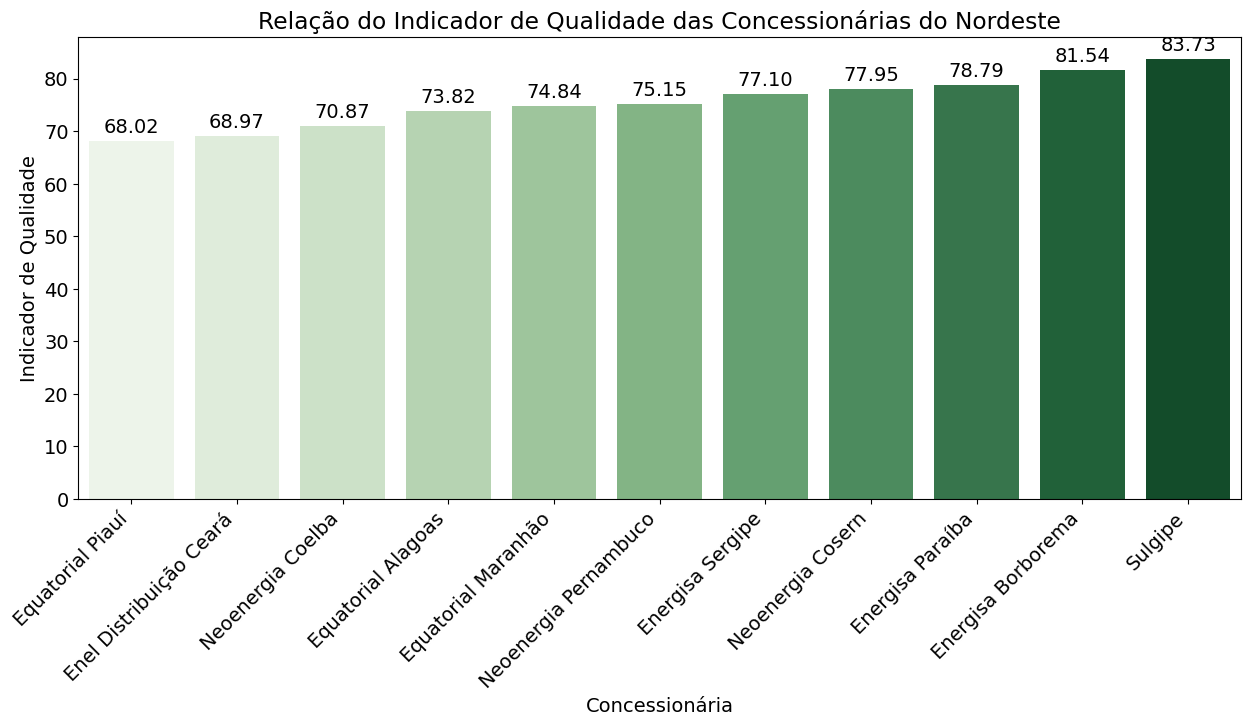

In [143]:
ax1 = sns.barplot(x='SigAgente', y='MdaIndicadorQualidade', data=df_qualidadede_nordeste_decr, palette=palette)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relação do Indicador de Qualidade das Concessionárias do Nordeste');
plt.xlabel('Concessionária')
plt.ylabel('Indicador de Qualidade')
plt.xticks(rotation=45, ha='right');

In [156]:
df_qualidadede_nordeste_decr['MdaIndicadorQualidade']

38    68.022712
46    68.970034
37    70.872767
34    73.821049
26    74.835191
27    75.151314
21    77.100749
15    77.950109
10    78.789312
9     81.543055
2     83.727286
Name: MdaIndicadorQualidade, dtype: float64

## Gráfico de Indicador de Satisfação

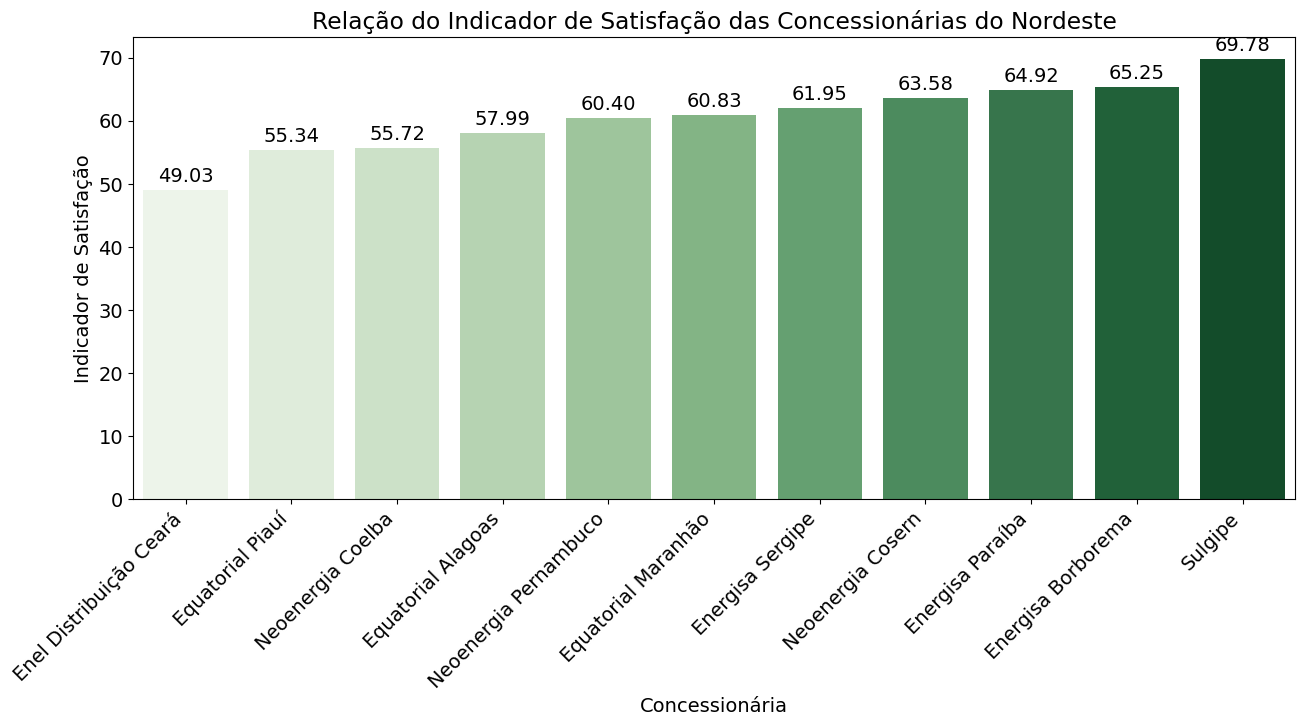

In [142]:
ax2 = sns.barplot(x='SigAgente', y='MdaIndicadorSatisfacao', data=df_satisfacao_nordeste_decr, palette=palette)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Relação do Indicador de Satisfação das Concessionárias do Nordeste');
plt.xlabel('Concessionária')
plt.ylabel('Indicador de Satisfação')
plt.xticks(rotation=45, ha='right');

In [155]:
df_satisfacao_nordeste_decr['MdaIndicadorSatisfacao']

46    49.027706
38    55.335840
37    55.722313
34    57.989951
27    60.397119
26    60.829761
21    61.948078
15    63.580641
10    64.917730
9     65.254925
2     69.779408
Name: MdaIndicadorSatisfacao, dtype: float64

## Gráfico de Indicador de Fidelidade

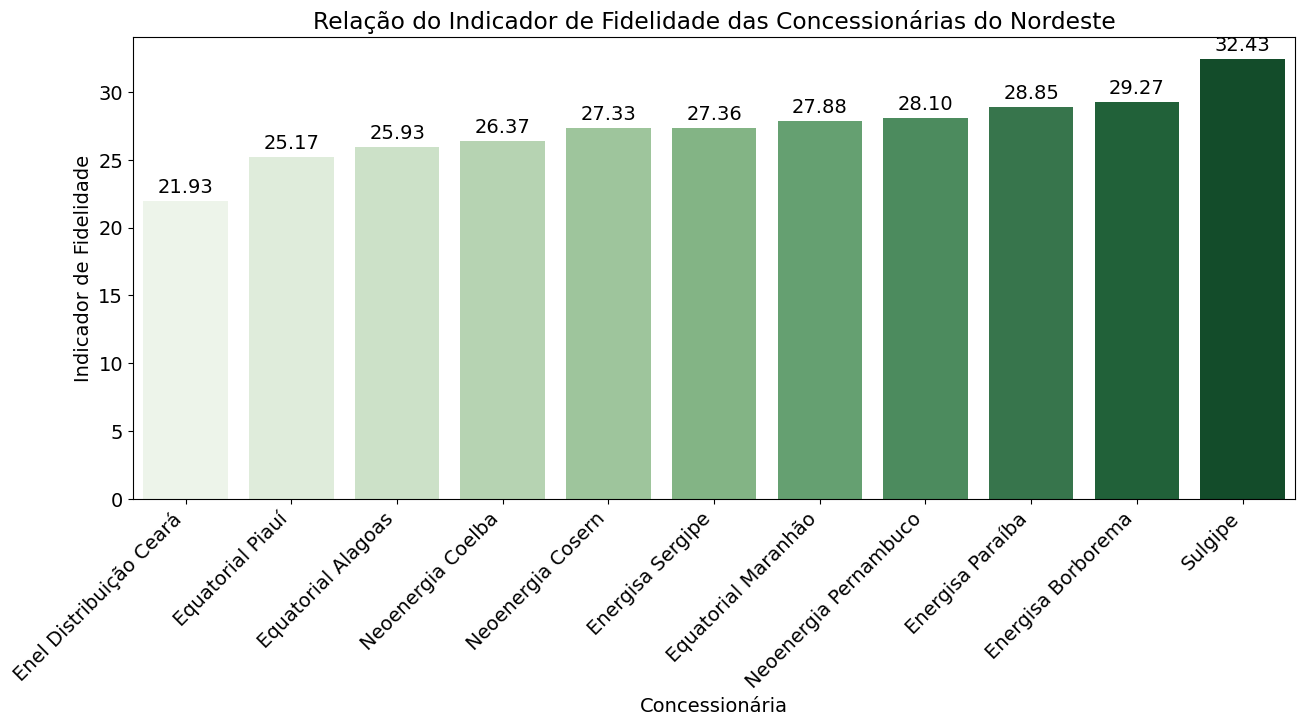

In [144]:
ax3 = sns.barplot(x='SigAgente', y='MdaIndicadorFidelidade', data=df_fidelidade_nordeste_decr, palette=palette)

for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relação do Indicador de Fidelidade das Concessionárias do Nordeste');
plt.xlabel('Concessionária')
plt.ylabel('Indicador de Fidelidade')
plt.xticks(rotation=45, ha='right');

In [146]:
df_fidelidade_nordeste_decr['MdaIndicadorFidelidade']

46    21.933622
38    25.170940
34    25.930736
37    26.373955
15    27.332524
21    27.362543
26    27.881041
27    28.101010
10    28.854357
9     29.269202
2     32.428941
Name: MdaIndicadorFidelidade, dtype: float64

## Subplot com os 3 gráficos

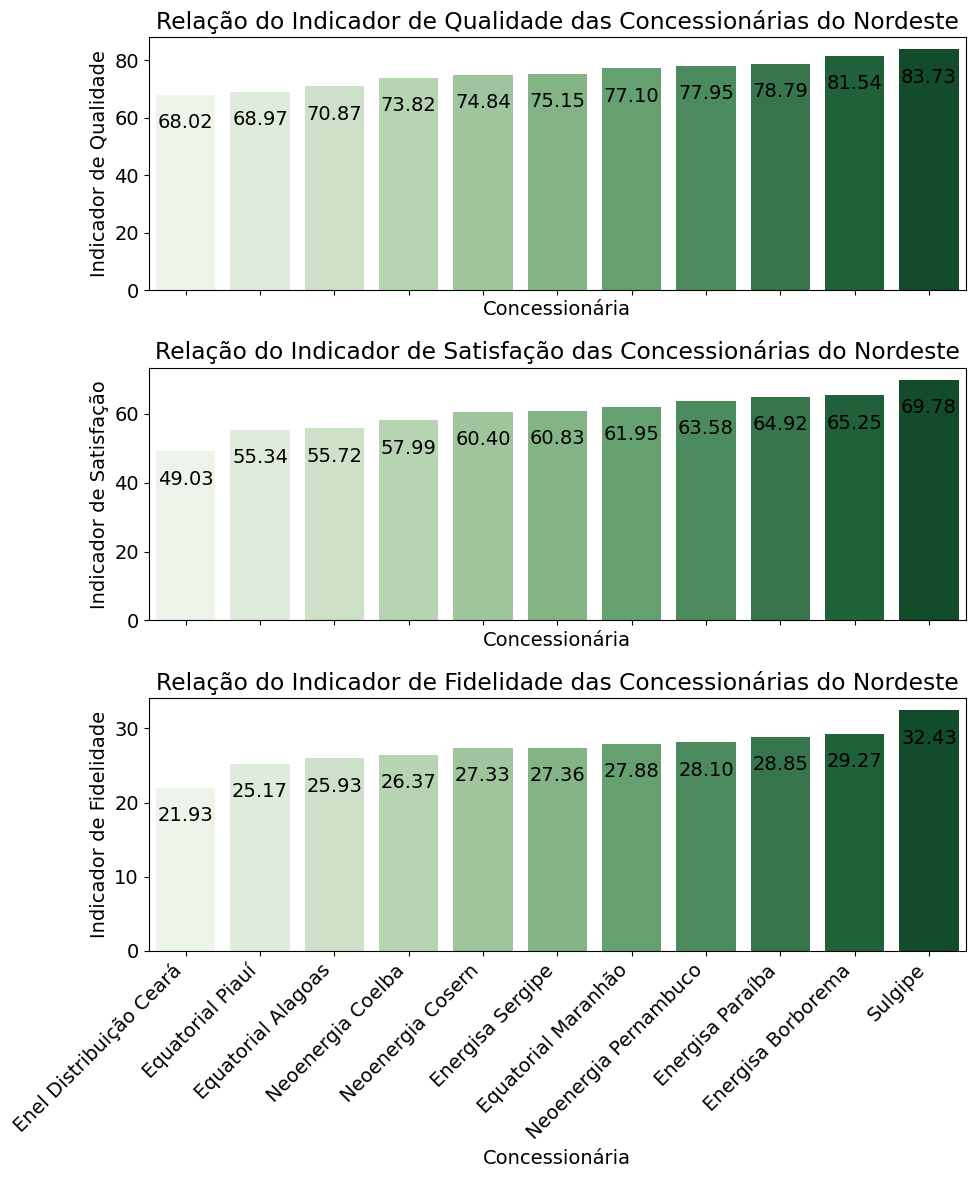

In [145]:
# Paleta de cores e saturação

palette = sns.color_palette("Greens", n_colors=len(df_qualidadede_nordeste_decr), desat=0.8)

# Criando subplot

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Gráfico 1
sns.barplot(x='SigAgente', y='MdaIndicadorQualidade', data=df_qualidadede_nordeste_decr, palette=palette, ax=ax1)
ax1.set_title('Relação do Indicador de Qualidade das Concessionárias do Nordeste')
ax1.set_xlabel('Concessionária')
ax1.set_ylabel('Indicador de Qualidade')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adicionar rótulos ao gráfico 1
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, -20), textcoords='offset points')

# Gráfico 2
sns.barplot(x='SigAgente', y='MdaIndicadorSatisfacao', data=df_satisfacao_nordeste_decr, palette=palette, ax=ax2)
ax2.set_title('Relação do Indicador de Satisfação das Concessionárias do Nordeste')
ax2.set_xlabel('Concessionária')
ax2.set_ylabel('Indicador de Satisfação')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adicionar rótulos ao gráfico 2
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, -20), textcoords='offset points')

# Gráfico 3
sns.barplot(x='SigAgente', y='MdaIndicadorFidelidade', data=df_fidelidade_nordeste_decr, palette=palette, ax=ax3)
ax3.set_title('Relação do Indicador de Fidelidade das Concessionárias do Nordeste')
ax3.set_xlabel('Concessionária')
ax3.set_ylabel('Indicador de Fidelidade')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Adicionar rótulos ao gráfico 3
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, -20), textcoords='offset points')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os subplots
plt.show()